## Importing neccessary Libraries

In [1]:
!pip install keras_preprocessing
import nltk
import pandas as pd
import numpy as np
import joblib
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras_preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Flatten, GRU, Conv1D, MaxPooling1D, Bidirectional
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from textblob import Word 
from wordcloud import WordCloud
from wordcloud import WordCloud,ImageColorGenerator
!pip install ktrain
import ktrain
from ktrain import text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.9 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 31.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 46.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.4/265.4 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 31.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Prepari

## Loading the dataset

In [17]:
df = pd.read_csv('/content/Final_Spam.csv', encoding='utf-8') 
df

,Spam,Text
0,Not-Spam,Ya but it cant display internal subs so i gott...
1,Spam,Panasonic & BluetoothHdset FREE. Nokia FREE. M...
2,Not-Spam,this is getting better and better you know NU...
3,Not-Spam,i can t believe i actually read a laugh out lo...
4,Not-Spam,She.s fine. I have had difficulties with her p...
...,...,...
8566,Not-Spam,Dai &lt;#&gt; naal eruku.
8567,Not-Spam,Hi Petey!noim ok just wanted 2 chat coz avent...
8568,Not-Spam,"Aight, you close by or still down around alex'..."
8569,Not-Spam,"Arms fine, how's Cardiff and uni?"


In [18]:
print(df['Spam'].value_counts())

Not-Spam    7325
Spam        1246
Name: Spam, dtype: int64


## Preprocess Data

In [19]:
df.isnull().sum()

Spam    0
Text    1
dtype: int64

In [20]:
df['Text']=df['Text'].fillna("") 
df.isna().sum()

Spam    0
Text    0
dtype: int64

In [21]:
df['Text'] =  df['Text'].str.lower()

df['Text'] = df['Text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', regex=True)

df['Text'] =  df['Text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress', regex=True)

df['Text'] =  df['Text'].str.replace(r'£|\$', 'moneysymb', regex=True)

df['Text'] =  df['Text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumbr', regex=True)

df['Text'] =  df['Text'].str.replace(r'\d+(\.\d+)?', 'numbr', regex=True)

df['Text'] =  df['Text'].str.replace(r'[^\w\d\s]', ' ', regex=True)

df['Text'] =  df['Text'].str.replace(r'\s+', ' ', regex=True)

df['Text'] =  df['Text'].str.replace(r'^\s+|\s+?$', '', regex=True)

stops = stopwords.words('english')
df['Text'] =  df['Text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stops))

df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

df['short_word'] = df['Text'].str.findall('\w{1,}')

In [22]:
df

,Spam,Text,short_word
0,Not-Spam,ya cant display internal sub gotta extract,"[ya, cant, display, internal, sub, gotta, extr..."
1,Spam,panasonic bluetoothhdset free nokia free motor...,"[panasonic, bluetoothhdset, free, nokia, free,..."
2,Not-Spam,getting better better know numberk utter shite...,"[getting, better, better, know, numberk, utter..."
3,Not-Spam,believe actually read laugh loud funny profile...,"[believe, actually, read, laugh, loud, funny, ..."
4,Not-Spam,fine difficulty phone work mine pls send anoth...,"[fine, difficulty, phone, work, mine, pls, sen..."
...,...,...,...
8566,Not-Spam,dai lt gt naal eruku,"[dai, lt, gt, naal, eruku]"
8567,Not-Spam,hi petey noi ok wanted numbr chat coz avent sp...,"[hi, petey, noi, ok, wanted, numbr, chat, coz,..."
8568,Not-Spam,aight close still around alex place,"[aight, close, still, around, alex, place]"
8569,Not-Spam,arm fine cardiff uni,"[arm, fine, cardiff, uni]"


In [25]:
df['length'] = df.Text.str.split().apply(len)

In [26]:
df = df[df['length'] <= 3200].copy()

# **Visualization**

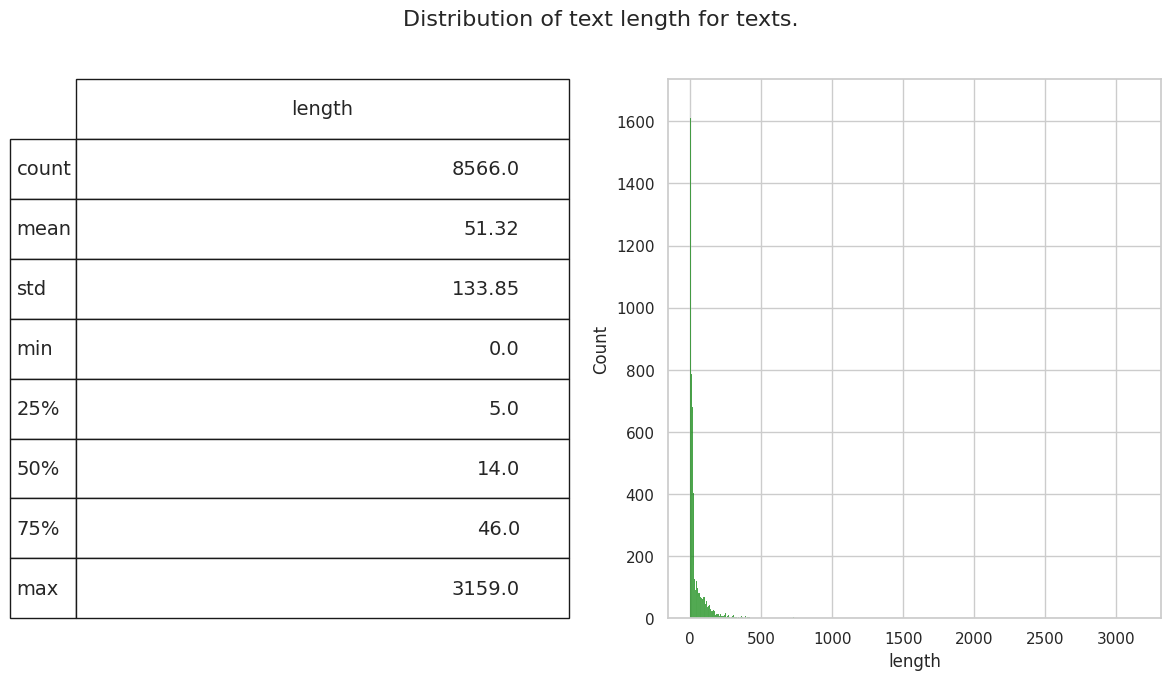

In [27]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(122)
sns.histplot(df['length'], ax=ax1,color='green')
describe = df.length.describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for texts.', fontsize=16)

plt.show()

<Axes: xlabel='Spam', ylabel='count'>

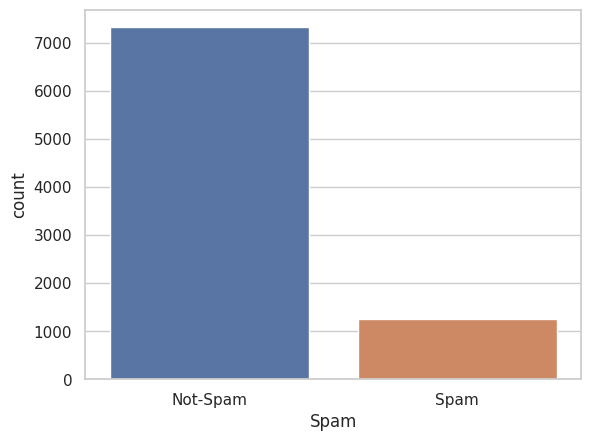

In [28]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df["Spam"])

In [29]:
top = Counter([item for sublist in df['short_word'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [34]:
Spam = df[df['Spam']=='Spam']
Not_Spam = df[df['Spam']=='Not-Spam'] 

In [35]:
top = Counter([item for sublist in Spam['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in Spam Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [37]:
top = Counter([item for sublist in Not_Spam['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in Not-Spam Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

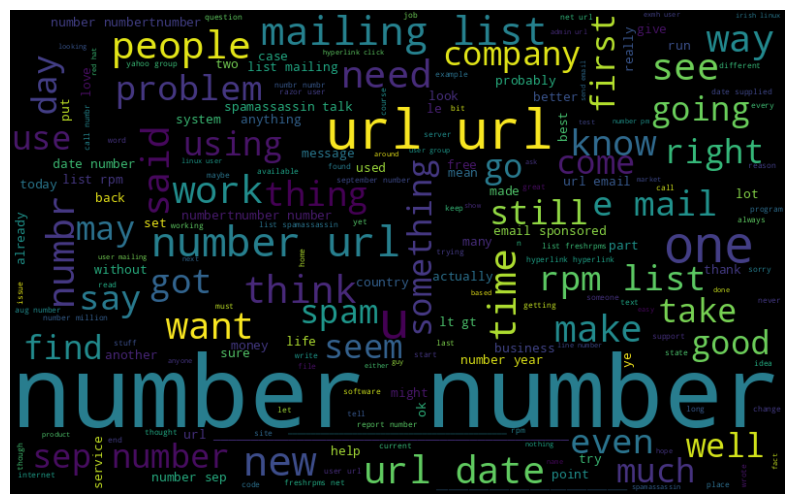

In [ ]:
normal_words =' '.join([text for text in df['Text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

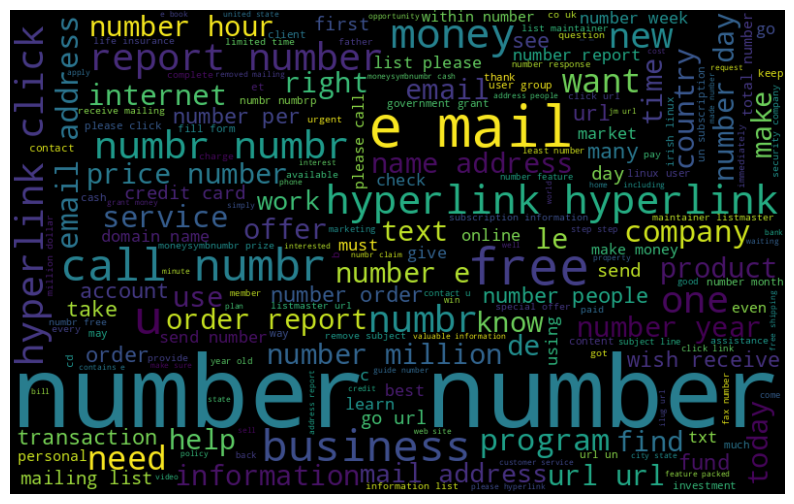

In [38]:
normal_words =' '.join([text for text in df['Text'][df['Spam'] == 'Spam']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

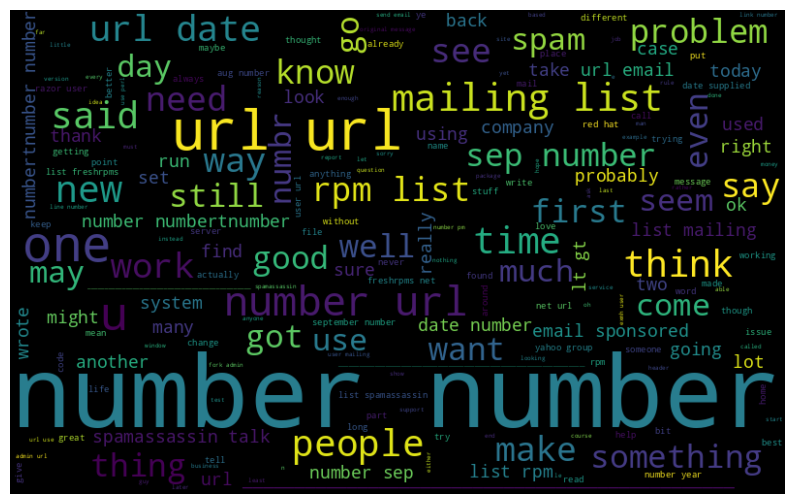

In [39]:
normal_words =' '.join([text for text in df['Text'][df['Spam'] == 'Not-Spam']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# **Applying N-gram**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df["Text"], df["Spam"], test_size=0.25, random_state=42)

tfidf = TfidfVectorizer(ngram_range=(1, 2), norm='l2', sublinear_tf=True)

x_train_tfidf = tfidf.fit_transform(x_train)

x_test_tfidf = tfidf.transform(x_test)

print(x_train_tfidf.shape, x_test_tfidf.shape, y_train.shape, y_test.shape)

(6424, 202549) (2142, 202549) (6424,) (2142,)


In [ ]:
joblib.dump(tfidf, 'tfidf.pkl')
#model = joblib.load('tfidf.pkl')

['tfidf.pkl']

# **ML Models**

# **Logistic Regression**

In [ ]:
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
lr.fit(x_train_tfidf, y_train)
y_pred1 = lr.predict(x_test_tfidf)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred1)*100))
print(classification_report(y_test, y_pred1))

Accuracy: 98.18%
              precision    recall  f1-score   support

    Not-Spam       0.98      1.00      0.99      1824
        Spam       0.99      0.89      0.94       318

    accuracy                           0.98      2142
   macro avg       0.99      0.94      0.96      2142
weighted avg       0.98      0.98      0.98      2142



In [ ]:
scores = cross_val_score(lr, x_train_tfidf,y_train, cv=10)  
print("Accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred1)*100))
score_str = " ".join("{:.2f}%".format(score * 100) for score in scores)
print("Cross-validated scores:", score_str)

Accuracy: 98.18%
Cross-validated scores: 96.11% 95.80% 96.27% 96.11% 93.93% 96.88% 94.86% 96.26% 96.57% 95.79%


In [ ]:
m = tfidf.transform(["free entry in a 2 weekly comp win fa cup final tkt numbrst may numbr text fa numbr receiv entri question std txt rate c appli numbrovernumbr"])
y_pred = lr.predict(m)
print(y_pred)

['Spam']


# **SVM**

In [ ]:
svc = LinearSVC()
svc.fit(x_train_tfidf, y_train)
y_pred2 = svc.predict(x_test_tfidf)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred2)*100))
print(classification_report(y_test, y_pred2))

Accuracy: 99.11%
              precision    recall  f1-score   support

    Not-Spam       0.99      1.00      0.99      1824
        Spam       0.98      0.96      0.97       318

    accuracy                           0.99      2142
   macro avg       0.99      0.98      0.98      2142
weighted avg       0.99      0.99      0.99      2142



In [ ]:
scores = cross_val_score(svc, x_train_tfidf,y_train, cv=10)   
print("Accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred2)*100))
score_str = " ".join("{:.2f}%".format(score * 100) for score in scores)
print("Cross-validated scores:", score_str)

Accuracy: 99.11%
Cross-validated scores: 97.20% 98.44% 97.82% 97.51% 97.04% 97.82% 96.73% 97.51% 97.66% 98.29%


In [ ]:
m = tfidf.transform(["free entry in a 2 weekly comp win fa cup final tkt numbrst may numbr text fa numbr receiv entri question std txt rate c appli numbrovernumbr"])
y_pred = svc.predict(m)
print(y_pred)

['Spam']


In [ ]:
joblib.dump(svc, 'spam_svm.pkl')
#model = joblib.load('spam_svm.pkl')

['spam_svm.pkl']

# **Multinomial Naive Bayes**

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train_tfidf, y_train)
y_pred3 = mnb.predict(x_test_tfidf)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred3)*100))
print(classification_report(y_test, y_pred3))

Accuracy: 92.58%
              precision    recall  f1-score   support

    Not-Spam       0.92      1.00      0.96      1824
        Spam       1.00      0.50      0.67       318

    accuracy                           0.93      2142
   macro avg       0.96      0.75      0.81      2142
weighted avg       0.93      0.93      0.91      2142



In [ ]:
scores = cross_val_score(mnb, x_train_tfidf,y_train, cv=10)   
print("Accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred3)*100))
score_str = " ".join("{:.2f}%".format(score * 100) for score in scores)
print("Cross-validated scores:", score_str)

Accuracy: 92.58%
Cross-validated scores: 91.29% 91.76% 91.91% 93.47% 90.34% 92.68% 90.97% 91.74% 92.06% 90.81%


In [ ]:
m = tfidf.transform(["free entry in a 2 weekly comp win fa cup final tkt numbrst may numbr text fa numbr receiv entri question std txt rate c appli numbrovernumbr"])
y_pred = mnb.predict(m)
print(y_pred)

['Spam']


# **Randomforest**

In [ ]:
rfc = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42, class_weight='balanced')
rfc.fit(x_train_tfidf,y_train)
y_pred4 = rfc.predict(x_test_tfidf)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred4)*100))
print(classification_report(y_test, y_pred4))

Accuracy: 97.53%
              precision    recall  f1-score   support

    Not-Spam       0.97      1.00      0.99      1824
        Spam       0.99      0.84      0.91       318

    accuracy                           0.98      2142
   macro avg       0.98      0.92      0.95      2142
weighted avg       0.98      0.98      0.97      2142



In [ ]:
scores = cross_val_score(rfc, x_train_tfidf,y_train, cv=10)   
print("Accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred4)*100))
score_str = " ".join("{:.2f}%".format(score * 100) for score in scores)
print("Cross-validated scores:", score_str)

Accuracy: 97.53%
Cross-validated scores: 97.51% 97.20% 97.51% 97.36% 96.26% 97.98% 96.73% 97.35% 97.51% 97.35%


In [ ]:
m = tfidf.transform(["free entry in a 2 weekly comp win fa cup final tkt numbrst may numbr text fa numbr receiv entri question std txt rate c appli numbrovernumbr"])
y_pred = rfc.predict(m)
print(y_pred)

['Spam']


# **GradientBoostingClassifier**

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=100, max_features=1.0, max_depth=4, random_state=1, verbose=1)
gbc.fit(x_train_tfidf, y_train)
y_pred5 = gbc.predict(x_test_tfidf)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred5)*100))
print(classification_report(y_test, y_pred5))

      Iter       Train Loss   Remaining Time 
         1           0.7017            1.10m
         2           0.6270            1.45m
         3           0.5738            1.35m
         4           0.5308            1.21m
         5           0.4943            1.08m
         6           0.4645            1.00m
         7           0.4377           56.80s
         8           0.4158           53.15s
         9           0.3957           50.81s
        10           0.3778           49.02s
        20           0.2686           37.03s
        30           0.2150           31.78s
        40           0.1829           31.72s
        50           0.1584           26.10s
        60           0.1410           21.65s
        70           0.1206           15.69s
        80           0.1106           11.94s
        90           0.1029            5.73s
       100           0.0967            0.00s
Accuracy: 97.76%
              precision    recall  f1-score   support

    Not-Spam       0.98    

In [ ]:
scores = cross_val_score(gbc, x_train_tfidf,y_train, cv=10)   
print("Accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred5)*100))
score_str = " ".join("{:.2f}%".format(score * 100) for score in scores)
print("Cross-validated scores:", score_str)

      Iter       Train Loss   Remaining Time 
         1           0.6988            1.94m
         2           0.6254            1.87m
         3           0.5714            1.80m
         4           0.5279            1.75m
         5           0.4906            1.74m
         6           0.4614            1.71m
         7           0.4350            1.70m
         8           0.4118            1.72m
         9           0.3908            1.84m
        10           0.3729            1.83m
        20           0.2648            1.63m
        30           0.2086            1.39m
        40           0.1775            1.19m
        50           0.1530           59.53s
        60           0.1303           47.56s
        70           0.1160           35.55s
        80           0.1068           23.73s
        90           0.0999           11.87s
       100           0.0944            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.7017            1.88m
        

In [ ]:
m = tfidf.transform(["free entry in a 2 weekly comp win fa cup final tkt numbrst may numbr text fa numbr receiv entri question std txt rate c appli numbrovernumbr"])
y_pred = gbc.predict(m)
print(y_pred)

['Spam']


# **XGBoost**

In [ ]:
le = LabelEncoder()
y_train_binary = le.fit_transform(y_train)
y_test_binary = le.transform(y_test)

xgb = XGBClassifier(n_estimators=100, max_depth=4, random_state=1)
xgb.fit(x_train_tfidf, y_train_binary)
y_pred6 = xgb.predict(x_test_tfidf)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test_binary, y_pred6)*100))
print(classification_report(y_test_binary, y_pred6))

Accuracy: 98.32%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1824
           1       0.97      0.91      0.94       318

    accuracy                           0.98      2142
   macro avg       0.98      0.95      0.97      2142
weighted avg       0.98      0.98      0.98      2142



In [ ]:
scores = cross_val_score(xgb, x_train_tfidf,y_train_binary, cv=10)   
print("Accuracy: {:.2f}%".format(accuracy_score(y_test_binary,y_pred6)*100))
score_str = " ".join("{:.2f}%".format(score * 100) for score in scores)
print("Cross-validated scores:", score_str)

Accuracy: 98.32%
Cross-validated scores: 97.20% 97.67% 99.07% 98.44% 97.66% 98.13% 97.82% 97.82% 98.29% 97.98%


In [ ]:
m = tfidf.transform(["free entry in a 2 weekly comp win fa cup final tkt numbrst may numbr text fa numbr receiv entri question std txt rate c appli numbrovernumbr"])
y_pred = xgb.predict(m)
print(y_pred)

[1]


# **Ensemble Classifier**

In [ ]:
mnb = MultinomialNB()
rfc= RandomForestClassifier(n_estimators=1000, max_depth=12, random_state=42)
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
svc = SVC(probability=True)
ec=VotingClassifier(estimators=[('Multinominal NB', mnb), ('Random Forest', rfc),('Logistic Regression',lr),('Support Vector Machine',svc)], voting='soft', weights=[1,2,3,4]) 
ec.fit(x_train_tfidf,y_train)                                                 
y_pred7 = ec.predict(x_test_tfidf)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred7)*100))
print(classification_report(y_test, y_pred7))

Accuracy: 98.83%
              precision    recall  f1-score   support

    Not-Spam       0.99      1.00      0.99      1824
        Spam       0.98      0.94      0.96       318

    accuracy                           0.99      2142
   macro avg       0.99      0.97      0.98      2142
weighted avg       0.99      0.99      0.99      2142



In [ ]:
scores = cross_val_score(ec, x_train_tfidf,y_train, cv=10)  
print("Accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred7)*100))
score_str = " ".join("{:.2f}%".format(score * 100) for score in scores)
print("Cross-validated scores:", score_str)

Accuracy: 98.83%
Cross-validated scores: 97.51% 97.98% 97.67% 97.51% 97.20% 97.66% 96.57% 97.51% 97.51% 97.98%


In [ ]:
m = tfidf.transform(["free entry in a 2 weekly comp win fa cup final tkt numbrst may numbr text fa numbr receiv entri question std txt rate c appli numbrovernumbr"])
y_pred = ec.predict(m)
print(y_pred)

['Spam']


In [ ]:
joblib.dump(svc, 'spam_ensemble.pkl')
#model = joblib.load('spam_ensemble.pkl')

['spam_ensemble.pkl']

# **AdaBoost with Random Forest Classifier**

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=0)
abc= AdaBoostClassifier(estimator=rfc, learning_rate=0.2, n_estimators=100)
abc.fit(x_train_tfidf, y_train)                                                   
y_pred8= abc.predict(x_test_tfidf)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred8)*100))
print(classification_report(y_test, y_pred8))

Accuracy: 97.15%
              precision    recall  f1-score   support

    Not-Spam       0.97      1.00      0.98      1824
        Spam       1.00      0.81      0.89       318

    accuracy                           0.97      2142
   macro avg       0.98      0.91      0.94      2142
weighted avg       0.97      0.97      0.97      2142



In [ ]:
scores = cross_val_score(abc, x_train_tfidf,y_train, cv=10)   
print("Accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred8)*100))
score_str = " ".join("{:.2f}% ".format(score * 100) for score in scores)
print("Cross-validated scores:", score_str)

Accuracy: 97.15%
Cross-validated scores: 97.05%  96.58%  97.36%  97.05%  96.26%  98.29%  96.42%  96.73%  97.04%  97.20% 


In [ ]:
m = tfidf.transform(["free entry in a 2 weekly comp win fa cup final tkt numbrst may numbr text fa numbr receiv entri question std txt rate c appli numbrovernumbr"])
y_pred = abc.predict(m)
print(y_pred)

['Spam']


# **Comparison Between ML Models**

In [ ]:
Comparison_unibi = pd.DataFrame({'Logistic Regression': [accuracy_score(y_test,y_pred1)*100,f1_score(y_test,y_pred1,average='macro')*100,recall_score(y_test, y_pred1,average='micro')*100,precision_score(y_test, y_pred1,average='micro')*100],
                            'SVM':[accuracy_score(y_test,y_pred2)*100,f1_score(y_test,y_pred2,average='macro')*100,recall_score(y_test, y_pred2,average='micro')*100,precision_score(y_test, y_pred2,average='micro')*100],
                           'Naive Bayes':[accuracy_score(y_test,y_pred3)*100,f1_score(y_test,y_pred3,average='macro')*100,recall_score(y_test, y_pred3,average='micro')*100,precision_score(y_test, y_pred3,average='micro')*100],
                           'Random Forest':[accuracy_score(y_test,y_pred4)*100,f1_score(y_test,y_pred4,average='macro')*100,recall_score(y_test, y_pred4,average='micro')*100,precision_score(y_test, y_pred4,average='micro')*100],
                           'GradientBoosting':[accuracy_score(y_test,y_pred5)*100,f1_score(y_test,y_pred5,average='macro')*100,recall_score(y_test, y_pred5,average='micro')*100,precision_score(y_test, y_pred5,average='micro')*100],
                           'XGBoost':[accuracy_score(y_test_binary,y_pred6)*100,f1_score(y_test_binary,y_pred6,average='macro')*100,recall_score(y_test_binary, y_pred6,average='micro')*100,precision_score(y_test_binary, y_pred6,average='micro')*100],
                           'Ensembled':[accuracy_score(y_test,y_pred7)*100,f1_score(y_test,y_pred7,average='macro')*100,recall_score(y_test, y_pred7,average='micro')*100,precision_score(y_test, y_pred7,average='micro')*100],
                           'Adaboost':[accuracy_score(y_test,y_pred8)*100,f1_score(y_test,y_pred8,average='macro')*100,recall_score(y_test, y_pred8,average='micro')*100,precision_score(y_test, y_pred8,average='micro')*100],

})

In [ ]:
print ('Comparison using uni-gram(1,2)') 
Comparison_unibi.rename(index={0:'Accuracy',1:'F1_score', 2: 'Recall',3:'Precision'}, inplace=True)
Comparison_unibi.head()

Comparison using uni-gram(1,2)


,Logistic Regression,SVM,Naive Bayes,Random Forest,GradientBoosting,XGBoost,Ensembled,Adaboost
Accuracy,98.179272,99.112979,92.577031,97.525677,97.759104,98.319328,98.832866,97.152194
F1_score,96.236422,98.234393,81.245075,94.768722,95.399748,96.587191,97.645867,93.891270
Recall,98.179272,99.112979,92.577031,97.525677,97.759104,98.319328,98.832866,97.152194
Precision,98.179272,99.112979,92.577031,97.525677,97.759104,98.319328,98.832866,97.152194




# **Deep Learning**

In [ ]:
vocabulary_size =25000
max_text_len = 80
tokenizer = Tokenizer(num_words=vocabulary_size)
tokenizer.fit_on_texts(df['Text'].values)
le=len(tokenizer.word_index)+1
print(le)
sequences = tokenizer.texts_to_sequences(df['Text'].values)
X_DeepLearning = pad_sequences(sequences, maxlen=max_text_len)
X_DeepLearning.shape[1]

34019


80

In [ ]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
df.loc[df['Spam'] == 'Not-Spam' , 'LABEL'] = 0     
df.loc[df['Spam'] == 'Spam', 'LABEL'] = 1              

labels = to_categorical(df['LABEL'], num_classes=2)
print(labels[:])

[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
XX_train, XX_test, y_train, y_test = train_test_split(X_DeepLearning , labels, test_size=0.25, random_state=42)
print((XX_train.shape, y_train.shape, XX_test.shape, y_test.shape))

((6428, 80), (6428, 2), (2143, 80), (2143, 2))


# **LSTM**

In [ ]:
epochs = 5
emb_dim = 128
batch_size = 32       
model_lstm1 = Sequential()
model_lstm1.add(Embedding(vocabulary_size,emb_dim, input_length=X_DeepLearning.shape[1]))
model_lstm1.add(SpatialDropout1D(0.8))                                             
model_lstm1.add(Bidirectional(LSTM(100, dropout=0.5, recurrent_dropout=0.5, return_sequences=True)))  
model_lstm1.add(Bidirectional(LSTM(100, dropout=0.5, recurrent_dropout=0.5)))                 
model_lstm1.add(Dropout(0.5))
model_lstm1.add(Dense(256, activation='relu'))
model_lstm1.add(Dropout(0.5))
model_lstm1.add(Dense(2, activation='softmax'))
model_lstm1.compile(optimizer='adam',loss='binary_crossentropy', metrics=['acc']) 
print(model_lstm1.summary())                                                                        

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 80, 128)           3200000   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 80, 128)          0         
 lDropout1D)                                                     
                                                                 
 bidirectional_2 (Bidirectio  (None, 80, 200)          183200    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 200)              240800    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                      

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath="lastm-1-layer-best_model.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)

early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)

reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history_lstm1 = model_lstm1.fit(XX_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(XX_test,y_test), callbacks=callbacks)

Epoch 1/5
201/201 [==============================] - ETA: 0s - loss: 0.2510 - acc: 0.9137
Epoch 1: val_acc improved from -inf to 0.97713, saving model to lastm-1-layer-best_model.h5
201/201 [==============================] - 173s 758ms/step - loss: 0.2510 - acc: 0.9137 - val_loss: 0.0785 - val_acc: 0.9771 - lr: 0.0010
Epoch 2/5
201/201 [==============================] - ETA: 0s - loss: 0.0870 - acc: 0.9751
Epoch 2: val_acc improved from 0.97713 to 0.97853, saving model to lastm-1-layer-best_model.h5
201/201 [==============================] - 148s 737ms/step - loss: 0.0870 - acc: 0.9751 - val_loss: 0.0814 - val_acc: 0.9785 - lr: 0.0010
Epoch 3/5
201/201 [==============================] - ETA: 0s - loss: 0.0630 - acc: 0.9837
Epoch 3: val_acc improved from 0.97853 to 0.98507, saving model to lastm-1-layer-best_model.h5
201/201 [==============================] - 150s 749ms/step - loss: 0.0630 - acc: 0.9837 - val_loss: 0.0612 - val_acc: 0.9851 - lr: 0.0010
Epoch 4/5
201/201 [===============

In [ ]:
results_1 = model_lstm1.evaluate(XX_test, y_test, verbose=False)
print(f'Test results - Loss: {results_1[0]} - Accuracy: {100*results_1[1]}%')

Test results - Loss: 0.06397475302219391 - Accuracy: 98.46010208129883%


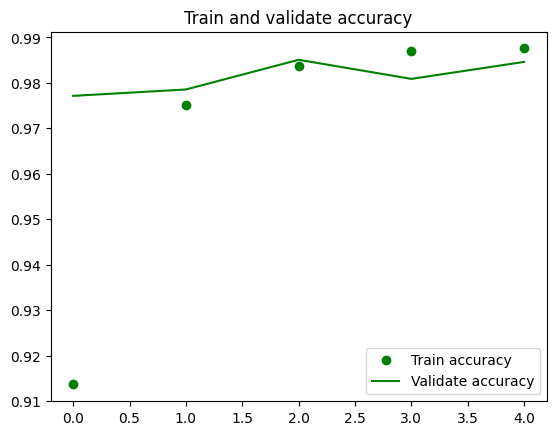

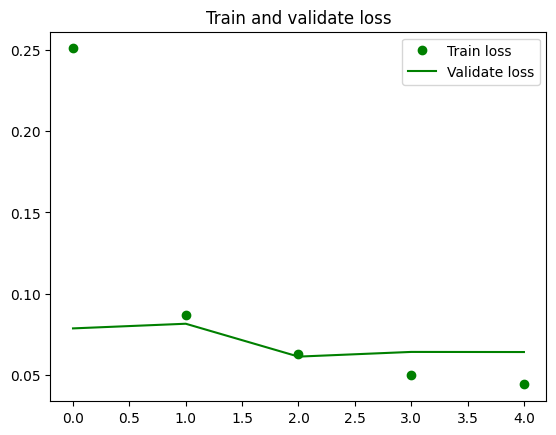

In [ ]:
acc = history_lstm1.history['acc']                        
val_acc = history_lstm1.history['val_acc']
loss = history_lstm1.history['loss']
val_loss = history_lstm1.history['val_loss']
plt.plot( acc, 'go', label='Train accuracy')
plt.plot( val_acc, 'g', label='Validate accuracy')
plt.title('Train and validate accuracy')
plt.legend()                                           

plt.figure()
plt.plot( loss, 'go', label='Train loss')
plt.plot( val_loss, 'g', label='Validate loss')
plt.title('Train and validate loss')
plt.legend()
plt.show()

In [ ]:
with open('/content/tokenizer.pickle', 'rb') as handle:
    tokenizers = pickle.load(handle)

model = load_model('/content/lastm-1-layer-best_model.h5')
#model.save('/content/drive/MyDrive/Colab_Notebooks/DL Model/Twitter Suicide Ideation Detection/lstm 1-layer.h5') 

twt = ["get 2 free entries of upcomming footbal match"]
twt = tokenizers.texts_to_sequences(twt)
twt = pad_sequences(twt, maxlen=80, dtype='int32')

predicted = model.predict(twt,batch_size=1,verbose = True)
if(np.argmax(predicted) == 0):
    print("Not-Spam")
elif (np.argmax(predicted) == 1):
    print("Spam")

1/1 [==============================] - 1s 1s/step
Not-Spam


# **Bert Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Spam'], test_size=0.33, random_state=42)

In [ ]:
X_train = X_train.tolist()
X_test = X_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

In [ ]:
class_names = ['Spam', 'Not-Spam']

In [ ]:
(x_train,y_train), (x_val,y_val), preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=512, 
                                                                       max_features=20000)

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


/usr/local/lib/python3.9/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


task: text classification


In [ ]:
model = text.text_classifier('bert', train_data=(x_train,y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 512


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


done.


In [ ]:
learner = ktrain.get_learner(model, train_data=(x_train,y_train), 
                             val_data=(x_val,y_val),
                             batch_size=6)

In [ ]:
learner.fit_onecycle(2e-5, 3)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
957/957 [==============================] - 918s 940ms/step - loss: 0.1116 - accuracy: 0.9620 - val_loss: 0.0297 - val_accuracy: 0.9919
Epoch 2/3
957/957 [==============================] - 897s 937ms/step - loss: 0.0307 - accuracy: 0.9909 - val_loss: 0.0388 - val_accuracy: 0.9883
Epoch 3/3
957/957 [==============================] - 878s 918ms/step - loss: 0.0067 - accuracy: 0.9979 - val_loss: 0.0273 - val_accuracy: 0.9943


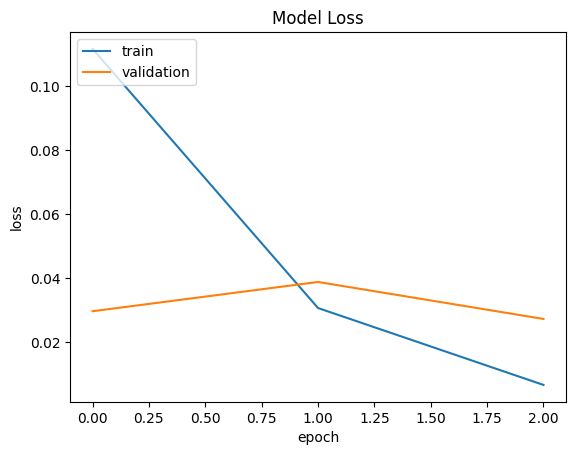

In [ ]:
learner.plot()

In [ ]:
learner.validate(val_data=(x_val,y_val), class_names=class_names)

89/89 [==============================] - 124s 1s/step
              precision    recall  f1-score   support

        Spam       1.00      1.00      1.00      2400
    Not-Spam       0.99      0.98      0.98       429

    accuracy                           0.99      2829
   macro avg       0.99      0.99      0.99      2829
weighted avg       0.99      0.99      0.99      2829



array([[2394,    6],
       [  10,  419]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

['Not-Spam', 'Spam']

In [ ]:
message = 'get 2 free entries'
prediction = predictor.predict(message)
print('predicted: {}'.format(prediction))

predicted: Spam


# **Save Bert Model**

In [ ]:
predictor.save("/content/drive/MyDrive/Colab_Notebooks/DL Model/Spam Message Detector/bert_model_spam")

# **Load Saved Model**

In [ ]:
predictor1 = ktrain.load_predictor('/content/drive/MyDrive/Colab_Notebooks/DL Model/Spam Message Detector/bert_model_spam')

/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
data = " get 2 free entries"
predictor1.predict(data)

'Spam'